<a href="https://colab.research.google.com/github/ChitrarthVasdev/CODSOFT/blob/main/titanicsurvival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK 1 : TITANIC SURVIVAL PREDICTION

# MADE BY: CHITRARTH VASDEV

# DOMAIN:DATA SCIENCE

# MODEL USED : DECISION TREE CLASSIFIER

# LANGUAGE : PYTHON

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Titanic-Dataset.csv")
display(df.head())



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Drop irrelevant columns
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"],errors='ignore')
display(df.head())

# Handle missing values
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Encode categorical columns
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])

# Features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)





,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


Accuracy Score: 0.8324022346368715
Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       110
           1       0.80      0.75      0.78        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:

[[97 13]
 [17 52]]


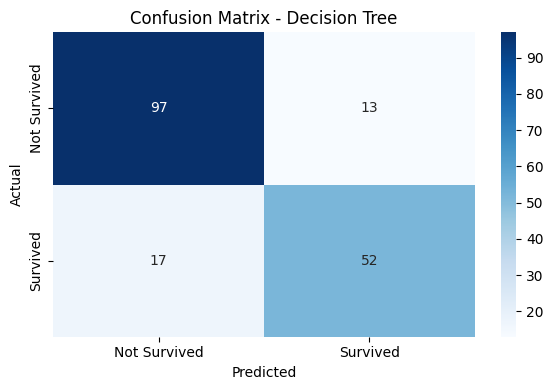

In [11]:
# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

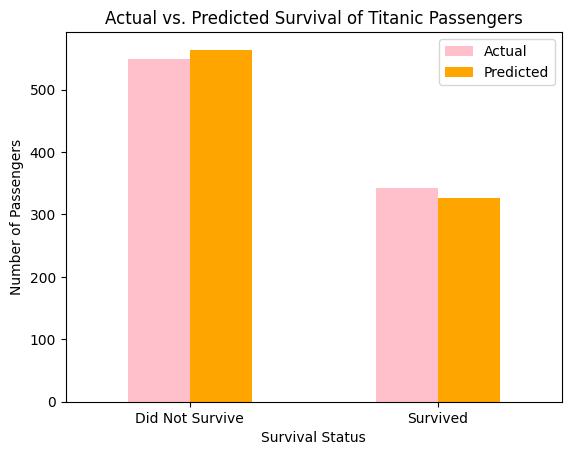

In [ ]:
import seaborn as sns

actual_counts = df['Survived'].value_counts().rename("Actual")
predicted_counts = df['Predicted_Survived'].value_counts().rename("Predicted")
comparison_df = pd.concat([actual_counts, predicted_counts], axis=1)

# Plotting the comparison bar chart
plt.figure(figsize=(8, 5))
comparison_df.plot(kind='bar', color=['pink', 'orange'])
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'], rotation=0)
plt.xlabel("Survival Status")
plt.ylabel("Number of Passengers")
plt.title("Actual vs. Predicted Survival of Titanic Passengers")
plt.legend(["Actual", "Predicted"])
plt.show()

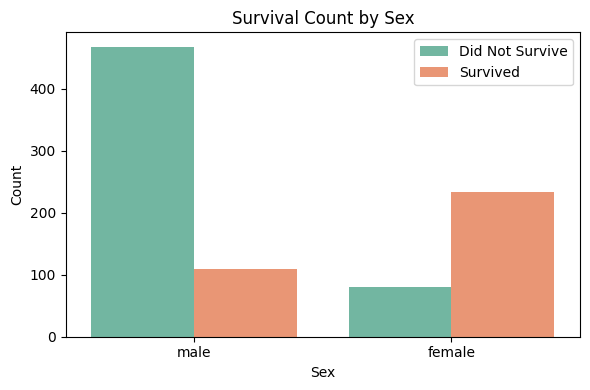

In [ ]:
# Survival count by Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=pd.read_csv('/content/Titanic-Dataset.csv'), palette='Set2')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(labels=['Did Not Survive', 'Survived'])
plt.tight_layout()
plt.show()


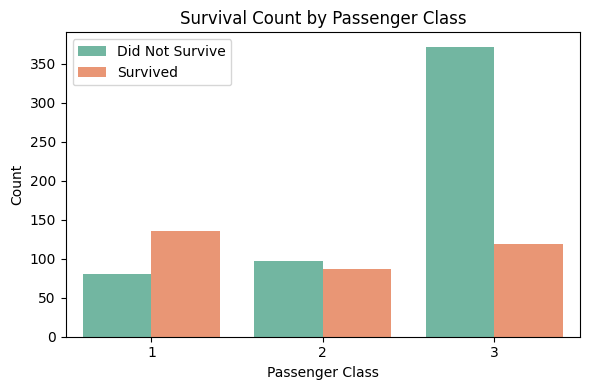

In [ ]:
# Survival count by Pclass
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=pd.read_csv('/content/Titanic-Dataset.csv'),palette='Set2')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(labels=['Did Not Survive', 'Survived'])
plt.tight_layout()
plt.show()


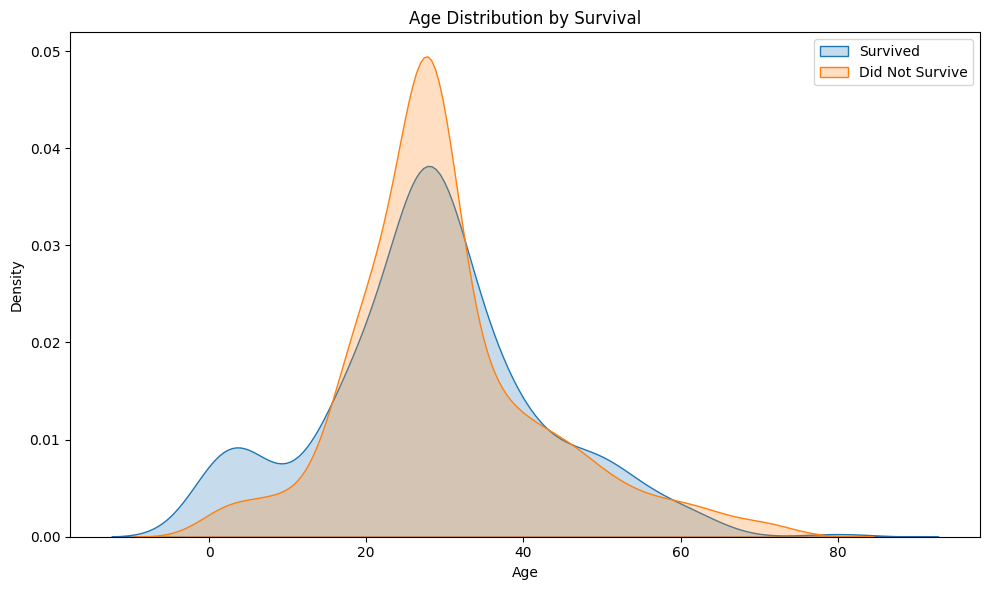

In [ ]:
# Age distribution for survivors vs non-survivors
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Survived'] == 1], x='Age', label='Survived', fill=True)
sns.kdeplot(data=df[df['Survived'] == 0], x='Age', label='Did Not Survive', fill=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()
